<a href="https://colab.research.google.com/github/Jacques961/Advanced-ML-Task/blob/main/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS Spam Classification (Text Classification)

# Load and explore the datasets

## Load the datasets

In [ ]:
%reset -f
import pandas as pd

data_frame_1 = pd.read_csv('/content/spam.csv')
data_frame_2 = pd.read_csv('/content/emails.csv')

print('SMS data shape:')
print(data_frame_1.shape)

print('\nEmails data shape:')
print(data_frame_2.shape)

SMS data shape:
(5572, 2)

Emails data shape:
(5728, 2)


## Explore columns and first few rows

In [ ]:
print('Columns in SMS data:')
print(data_frame_1.columns)

print('\nData head of SMS data:')
print(data_frame_1.head())

print('\nColumns in Emails data:')
print(data_frame_2.columns)

print('\nData head of Email data:')
print(data_frame_2.head())

Columns in SMS data:
Index(['Category', 'Message'], dtype='object')

Data head of SMS data:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Columns in Emails data:
Index(['text', 'spam'], dtype='object')

Data head of Email data:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


## Check null values count in datatsets

In [ ]:
print('\nNull values count in SMS data:')
print(data_frame_1.isna().sum())

print('\nNull values count in Emails data:')
print(data_frame_2.isna().sum())


Null values count in SMS data:
Category    0
Message     0
dtype: int64

Null values count in Emails data:
text    0
spam    0
dtype: int64


## Datatypes in datasets

In [ ]:
print('\nData types in SMS data:')
print(data_frame_1.dtypes)

print('\nData types in Emails data:')
print(data_frame_1.dtypes)


Data types in SMS data:
Category    object
Message     object
dtype: object

Data types in Emails data:
Category    object
Message     object
dtype: object


## Generate an automatic Explanatory Data Analysis EDA report

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e995b931ded91c4fa76362485c52d7c0aed5d50d3099f7fc41727a759a55ae94
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile_data_frame_1 = ProfileReport(data_frame_1, title="SMS Data Profiling Report")
profile_data_frame_2 = ProfileReport(data_frame_2, title="Emails Data Profiling Report")

profile_data_frame_1.to_file("sms_data_report.html")
print('EDA report created for SMS dataset\n\n\n')

profile_data_frame_2.to_file("emails_data_report.html")
print('EDA report created for Emails dataset')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report created for SMS dataset





Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:05<00:00,  2.66s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report created for Emails dataset


# Datasets Preprocessing, Cleaning and Resampling

## Drop duplicate rows from datasets

In [ ]:
print('There are', data_frame_1.duplicated().sum(),'duplicate rows in SMS dataset')
print('There are', data_frame_2.duplicated().sum(),'duplicate rows in Emails dataset')

# remove duplicates from data_frame_1
data_frame_1 = data_frame_1.drop_duplicates().copy()
print('\nDuplicate rows in SMS data are:', data_frame_1.duplicated().sum())

# remove duplicated from data_frame_2
data_frame_2 = data_frame_2.drop_duplicates().copy()
print('Duplicate rows in Emails data are:', data_frame_2.duplicated().sum())

There are 415 duplicate rows in SMS dataset
There are 33 duplicate rows in Emails dataset

Duplicate rows in SMS data are: 0
Duplicate rows in Emails data are: 0


## Check data distribution in datasets

In [ ]:
print('SMS data distribution:')
print(data_frame_1['Category'].value_counts())
data_frame_1_imbalance_ratio = data_frame_1['Category'].value_counts().iloc[0]/ data_frame_1['Category'].value_counts().iloc[1]
print('Imbalanace ratio:', data_frame_1_imbalance_ratio)

print('\nEmails data distribution:')
data_frame_2_imbalance_ratio = data_frame_2['spam'].value_counts().iloc[0] / data_frame_2['spam'].value_counts().iloc[1]
print(data_frame_2['spam'].value_counts())
print('Imbalance ratio:', data_frame_2_imbalance_ratio)

SMS data distribution:
Category
ham     4516
spam     641
Name: count, dtype: int64
Imbalanace ratio: 7.045241809672387

Emails data distribution:
spam
0    4327
1    1368
Name: count, dtype: int64
Imbalance ratio: 3.163011695906433


## Plot data distribution

/tmp/ipython-input-10-3555647636.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Spam')


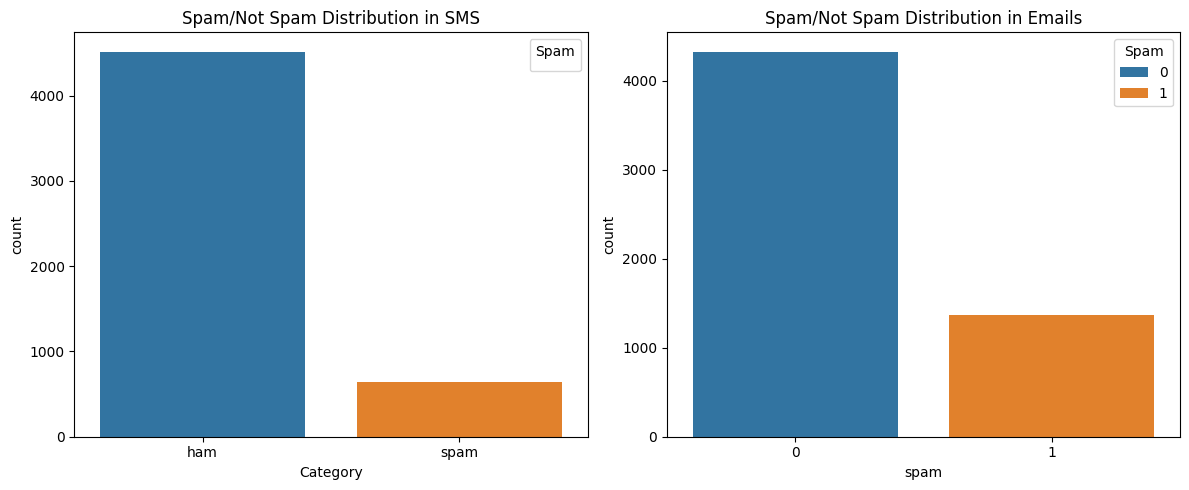

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: SMS Scatter plot
sns.countplot(data=data_frame_1, x='Category', hue='Category', ax=axes[0])
axes[0].set_title('Spam/Not Spam Distribution in SMS')
axes[0].legend(title='Spam')

# Plot 2: Email Data
sns.countplot(data=data_frame_2, x='spam', hue='spam', ax=axes[1])
axes[1].set_title('Spam/Not Spam Distribution in Emails')
axes[1].legend(title='Spam')

plt.tight_layout()
plt.show()


***Data distribution for both classes is imbalanced so we need to do resampling for the data***




## Rename columns as 'text' and 'label'

In [ ]:
data_frame_1.rename(columns={'Category': 'label', 'Message': 'text'}, inplace=True)
data_frame_2.rename(columns={'spam': 'label', 'text':'text'}, inplace=True)

## Map label values to 0 for not spam and 1 for spam in SMS data

In [ ]:
data_frame_1['label'] = data_frame_1['label'].map({'ham': 0, 'spam': 1})

## Add length column for datasets

In [ ]:
data_frame_1['length'] = data_frame_1['text'].apply(lambda x: len(x))
print(data_frame_1.head())

data_frame_2['length'] = data_frame_2['text'].apply(lambda x: len(x))
print(data_frame_2.head())

   label                                               text  length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61
                                                text  label  length
0  Subject: naturally irresistible your corporate...      1    1484
1  Subject: the stock trading gunslinger  fanny i...      1     598
2  Subject: unbelievable new homes made easy  im ...      1     448
3  Subject: 4 color printing special  request add...      1     500
4  Subject: do not have money , get software cds ...      1     235


## Pipeline for cleaning text raw data

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
import re
import string

# remove the 'Subject' from text in Emails data
def remove_subject_from_text_emails(text: str):
    if text.lower().startswith("subject:"):
        return text[len("subject:"):].strip()
    return text

# to lower
def to_lower(text: str):
  return text.lower()

# remove numbers from text
def remove_numbers(text: str):
  for c in text:
    if c.isnumeric():
      text = text.replace(c,' ')
  return text

# lemmatizing
def lemmatizing(text: str):
  lemmatizer = WordNetLemmatizer()
  tokens = word_tokenize(text)
  for i in range(len(tokens)):
    lemma_world = lemmatizer.lemmatize(tokens[i])
    tokens[i] = lemma_world
  return " ".join(tokens)

# remove punctuation
def remove_punctuation(text: str):
  for c in text:
    if c in string.punctuation:
      text = text.replace(c,'')
  return text

# remove stop words
def remove_stopwords(text: str):
  removed = []
  stop_words = list(stopwords.words("english"))
  tokens = word_tokenize(text)
  for i in range(len(tokens)):
    if tokens[i] not in stop_words:
      removed.append(tokens[i])
  return " ".join(removed)

# remove extra white spaces
def remove_extra_white_spaces(text: str):
  single_char_pattern = r'\s+[a-zA-Z]\s+'
  without_sc = re.sub(pattern=single_char_pattern, repl=" ", string= text)
  return without_sc

data_frame_2['text'] = data_frame_2['text'].apply(lambda x: remove_subject_from_text_emails(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: to_lower(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: to_lower(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: remove_numbers(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: remove_numbers(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: remove_punctuation(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: remove_punctuation(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: remove_stopwords(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: remove_stopwords(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: remove_extra_white_spaces(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: remove_extra_white_spaces(x))

data_frame_1['text'] = data_frame_1['text'].apply(lambda x: lemmatizing(x))
data_frame_2['text'] = data_frame_2['text'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Update the length after cleaning

In [ ]:
data_frame_1['length_after_cleaning'] = data_frame_1['text'].apply(lambda x: len(x)).copy()
data_frame_2['length_after_cleaning'] = data_frame_2['text'].apply(lambda x:len(x)).copy()

print('After cleaning SMS data:')
display(data_frame_1.head())

print('\nAfter cleaning Emails data:')
display(data_frame_2.head())


After cleaning SMS data:


,label,text,length,length_after_cleaning
0,0,go jurong point crazy available bugis great wo...,111,78
1,0,ok lar joking wif oni,29,21
2,1,free entry wkly comp win fa cup final tkts st ...,155,101
3,0,u dun say early hor c already say,49,33
4,0,nah dont think go usf life around though,61,40



After cleaning Emails data:


,text,label,length,length_after_cleaning
0,naturally irresistible corporate identity lt r...,1,1484,880
1,stock trading gunslinger fanny merrill muzo co...,1,598,497
2,unbelievable new home made easy im wanting sho...,1,448,268
3,color printing special request additional info...,1,500,321
4,money get software cd software compatibility g...,1,235,120


## Better to split now the data into training and testing to avoid data leakage

In [ ]:
from sklearn.model_selection import train_test_split
# split SMS data
X_train_SMS, X_test_SMS, y_train_SMS, y_test_SMS = train_test_split(data_frame_1['text'], data_frame_1['label'], test_size = 0.25,
                                                                    stratify = data_frame_1['label'], random_state=42)
print('Distribution in SMS train data: ')
display(y_train_SMS.value_counts())

# split Emails data
X_train_Emails, X_test_Emails, y_train_Emails, y_test_Emails = train_test_split(data_frame_2['text'], data_frame_2['label'], test_size = 0.25,
                                                                                stratify = data_frame_2['label'], random_state=42)
print('\nDistribution in Emails train data: ')
display(y_train_Emails.value_counts())

Distribution in SMS train data: 


,count
label,
0,3386
1,481



Distribution in Emails train data: 


,count
label,
0,3245
1,1026


## Augment SMS training data using NLPAUG

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 11.8 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug
from tqdm import tqdm

# make a data frame from the training data of SMS data
data_frame_1_training = pd.DataFrame({'text': X_train_SMS, 'label': y_train_SMS})

print('Distribution before augmentation:')
display(data_frame_1_training['label'].value_counts())

augmenter = aug.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased',
    action="insert",
    top_k=20)

augmented_rows = []

# augment the entries having label as 1 in the sample_data_frame_1 and append it
spam_df = data_frame_1_training[data_frame_1_training['label'] == 1].reset_index(drop=True)

for i in tqdm(range(len(spam_df)), desc="Augmenting spam messages"):
    for _ in range(3):
        augmented = augmenter.augment(spam_df.iloc[i]['text'])
        if isinstance(augmented, list):
            augmented_text = " ".join(augmented)
        else:
            augmented_text = augmented
        augmented_rows.append({'text': augmented_text, 'label': 1})

aug_df = pd.DataFrame(augmented_rows)
data_frame_1_training_augmented = pd.concat([data_frame_1_training, aug_df], ignore_index=True)

print('\nDistribution after augmentation:')
display(data_frame_1_training_augmented['label'].value_counts())


Distribution before augmentation:


,count
label,
0,3386
1,481


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

The following layers were not sharded: distilbert.transformer.layer.*.attention.k_lin.bias, distilbert.transformer.layer.*.attention.v_lin.bias, distilbert.embeddings.LayerNorm.weight, vocab_projector.bias, distilbert.embeddings.LayerNorm.bias, distilbert.transformer.layer.*.attention.v_lin.weight, distilbert.transformer.layer.*.attention.q_lin.bias, distilbert.embeddings.word_embeddings.weight, distilbert.transformer.layer.*.output_layer_norm.bias, distilbert.transformer.layer.*.ffn.lin*.weight, distilbert.transformer.layer.*.output_layer_norm.weight, vocab_transform.weight, distilbert.embeddings.position_embeddings.weight, distilbert.transformer.layer.*.sa_layer_norm.bias, vocab_layer_norm.bias, vocab_layer_norm.weight, distilbert.transformer.layer.*.attention.out_lin.weight, distilbert.transformer.layer.*.attention.k_lin.weight, distilbert.transformer.layer.*.ffn.lin*.bias, vocab_transform.bias, vocab_projector.weight, distilbert.transformer.layer.*.sa_layer_norm.weight, distilbert.


Distribution after augmentation:


,count
label,
0,3386
1,1924


 ## Set training SMS data

In [ ]:
X_train_SMS_balanced = data_frame_1_training_augmented['text']
y_train_SMS_balanced = data_frame_1_training_augmented['label']

## Save a raw version of SMS augmented data

In [ ]:
X_train_SMS_balanced_raw = X_train_SMS_balanced.copy()
y_train_SMS_balanced_raw = y_train_SMS_balanced.copy()

X_test_SMS_raw = X_test_SMS.copy()

## Vectorize text in SMS data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_SMS = TfidfVectorizer()
X_train_SMS_balanced = vectorizer_SMS.fit_transform(X_train_SMS_balanced)
X_test_SMS = vectorizer_SMS.transform(X_test_SMS)

## Augment Emails data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# vectorize the text before applying SMOTE
vectorizer_Emails = TfidfVectorizer()
X_train_Emails_vectorized = vectorizer_Emails.fit_transform(X_train_Emails)

# apply SMOTE
smote = SMOTE(random_state=42)
X_train_Emails_balanced, y_train_Emails_balanced = smote.fit_resample(X_train_Emails_vectorized, y_train_Emails)

print('Distribution before augmentation:')
display(y_train_Emails.value_counts())

print('\nDistribution after augmentation:')
display(y_train_Emails_balanced.value_counts())


Distribution before augmentation:


,count
label,
0,3245
1,1026



Distribution after augmentation:


,count
label,
0,3245
1,3245


## Vectorize text in test Emails data

In [ ]:
X_test_Emails = vectorizer_Emails.transform(X_test_Emails)

# Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
import numpy as np

# define the parameter grid
param_grid = [
    # Most commonly used: L2 penalty with reliable solvers
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 1000]
    },
    # L1 penalty: only use liblinear for speed and compatibility
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear'],
        'max_iter': [1000]
    }
]


### SMS Logistic Regression Model

Logistic Regression Model on SMS Dataset:
Fitting 4 folds for each of 19 candidates, totalling 76 fits

Training accuracy:
0.9990583804143126

Best parameters:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best estimator:
LogisticRegression(C=10)

Best score:
0.9872059741203129

Testing accuracy:
0.9728682170542635

Confusion matrix:
[[1118   12]
 [  23  137]]


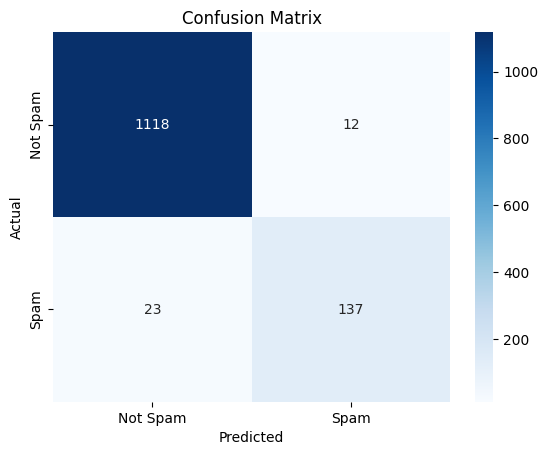


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1130
           1       0.92      0.86      0.89       160

    accuracy                           0.97      1290
   macro avg       0.95      0.92      0.94      1290
weighted avg       0.97      0.97      0.97      1290



In [ ]:
logistic_regression_model_SMS = GridSearchCV(LogisticRegression(), param_grid, cv=4, scoring='f1', n_jobs=-1, verbose=1)

print('Logistic Regression Model on SMS Dataset:')
logistic_regression_model_SMS.fit(X_train_SMS_balanced, y_train_SMS_balanced)

print('\nTraining accuracy:')
y_train_pred = logistic_regression_model_SMS.predict(X_train_SMS_balanced)
print(sklearn.metrics.accuracy_score(y_train_SMS_balanced, y_train_pred))

print('\nBest parameters:')
print(logistic_regression_model_SMS.best_params_)

print('\nBest estimator:')
print(logistic_regression_model_SMS.best_estimator_)

print('\nBest score:')
print(logistic_regression_model_SMS.best_score_)

# testing the model

predictSMS = logistic_regression_model_SMS.predict(X_test_SMS)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_SMS, predictSMS))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_SMS, predictSMS))

cm1 = confusion_matrix(y_test_SMS, predictSMS)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_SMS, predictSMS))

#### Investigate misclassified SMS messages

In [ ]:
misclassified_indices = np.where(predictSMS != y_test_SMS)[0]
print(f"\nNumber of misclassified SMS: {len(misclassified_indices)}")

error_df = pd.DataFrame({
    'text': X_test_SMS_raw.iloc[misclassified_indices],  # this is the cleaned version of test data
    'true_label': y_test_SMS.iloc[misclassified_indices].values,
    'predicted': predictSMS[misclassified_indices]
})

print("\nSample misclassified SMS messages:")
display(error_df.head(5))



Number of misclassified SMS: 35

Sample misclassified SMS messages:


,text,true_label,predicted
4968,donate £ unicef asian tsunami disaster support...,1,0
495,free nowcan call,0,1
5370,datingi two started sent text talk sport radio...,1,0
4035,wot thout gon na call txt bak luv k,0,1
2057,please charge mobile get morning,0,1


### Emails Logistic Regression Model

Logistic Regression Model on Emails Dataset:
Fitting 4 folds for each of 19 candidates, totalling 76 fits

Training accuracy:
1.0

Best parameters:
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best estimator:
LogisticRegression(C=10)

Best score:
0.9956998605215814

Testing accuracy:
0.9936797752808989

Confusion matrix:
[[1076    6]
 [   3  339]]


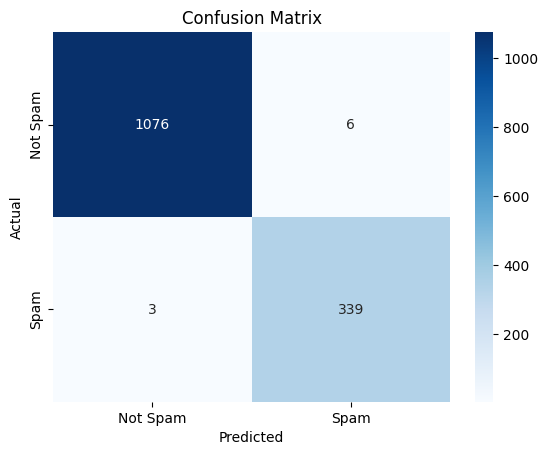


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1082
           1       0.98      0.99      0.99       342

    accuracy                           0.99      1424
   macro avg       0.99      0.99      0.99      1424
weighted avg       0.99      0.99      0.99      1424



In [ ]:
logistic_regression_model_Emails = GridSearchCV(LogisticRegression(), param_grid, cv=4, scoring='f1', n_jobs=-1, verbose=1)

print('Logistic Regression Model on Emails Dataset:')
logistic_regression_model_Emails.fit(X_train_Emails_balanced, y_train_Emails_balanced)

print('\nTraining accuracy:')
y_train_pred = logistic_regression_model_Emails.predict(X_train_Emails_balanced)
print(sklearn.metrics.accuracy_score(y_train_Emails_balanced, y_train_pred))

print('\nBest parameters:')
print(logistic_regression_model_Emails.best_params_)

print('\nBest estimator:')
print(logistic_regression_model_Emails.best_estimator_)

print('\nBest score:')
print(logistic_regression_model_Emails.best_score_)

# testing the model

predictEmails = logistic_regression_model_Emails.predict(X_test_Emails)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_Emails, predictEmails))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_Emails, predictEmails))

cm1 = confusion_matrix(y_test_Emails, predictEmails)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_Emails, predictEmails))

## Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB

### SMS Multinomial Model

Multinomial Model on SMS Dataset:

Training accuracy:
0.9883239171374765

Testing accuracy:
0.9674418604651163

Confusion matrix:
[[1106   24]
 [  18  142]]


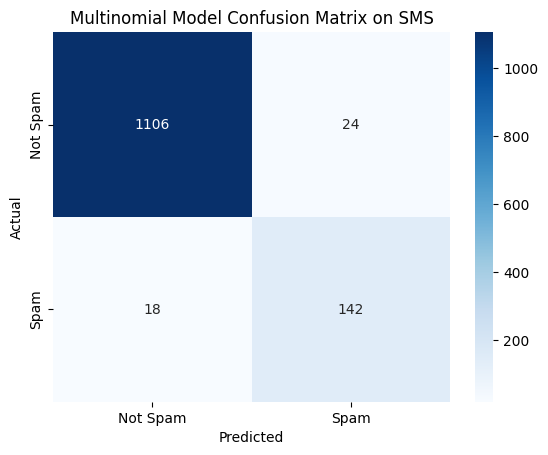


Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1130
           1       0.86      0.89      0.87       160

    accuracy                           0.97      1290
   macro avg       0.92      0.93      0.93      1290
weighted avg       0.97      0.97      0.97      1290



In [ ]:
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_nb_SMS = GridSearchCV(MultinomialNB(), param_grid_nb, cv=4, scoring='f1', n_jobs=-1)
multinomial_model_SMS = MultinomialNB()

print('Multinomial Model on SMS Dataset:')
multinomial_model_SMS.fit(X_train_SMS_balanced, y_train_SMS_balanced)

print('\nTraining accuracy:')
y_train_pred = multinomial_model_SMS.predict(X_train_SMS_balanced)
print(sklearn.metrics.accuracy_score(y_train_SMS_balanced, y_train_pred))

# testing the model

predictSMS = multinomial_model_SMS.predict(X_test_SMS)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_SMS, predictSMS))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_SMS, predictSMS))

cm1 = confusion_matrix(y_test_SMS, predictSMS)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Model Confusion Matrix on SMS')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_SMS, predictSMS))

### Emails Multinomial Model

Multinomial Model on Emails Dataset:

Training accuracy:
0.9990755007704161

Testing accuracy:
0.9957865168539326

Confusion matrix:
[[1079    3]
 [   3  339]]


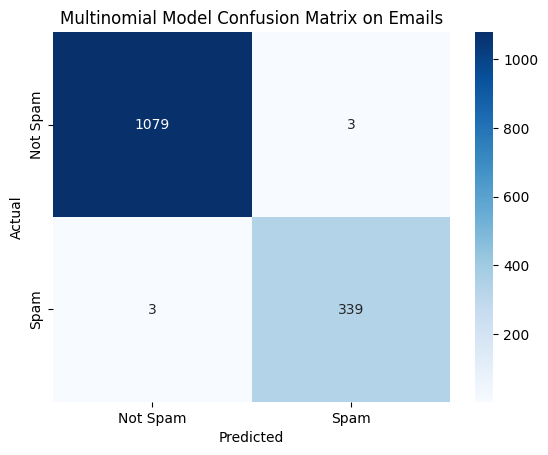


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       0.99      0.99      0.99       342

    accuracy                           1.00      1424
   macro avg       0.99      0.99      0.99      1424
weighted avg       1.00      1.00      1.00      1424



In [ ]:
multinomial_model_Emails = GridSearchCV(MultinomialNB(), param_grid_nb, cv=4, scoring='f1', n_jobs=-1)

print('Multinomial Model on Emails Dataset:')
multinomial_model_Emails.fit(X_train_Emails_balanced, y_train_Emails_balanced)

print('\nTraining accuracy:')
y_train_pred = multinomial_model_Emails.predict(X_train_Emails_balanced)
print(sklearn.metrics.accuracy_score(y_train_Emails_balanced, y_train_pred))

# testing the model

predictEmails = multinomial_model_Emails.predict(X_test_Emails)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_Emails, predictEmails))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_Emails, predictEmails))

cm1 = confusion_matrix(y_test_Emails, predictEmails)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial Model Confusion Matrix on Emails')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_Emails, predictEmails))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### SMS Random Forest Classifier Model

RFC Model on SMS Dataset:

Training accuracy:
1.0

Testing accuracy:
0.9751937984496124

Confusion matrix:
[[1126    4]
 [  28  132]]


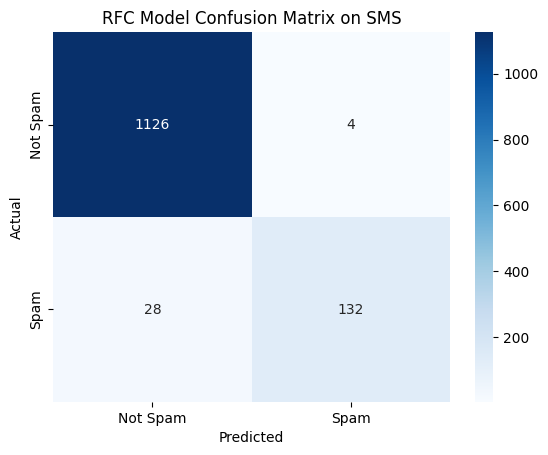


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1130
           1       0.97      0.82      0.89       160

    accuracy                           0.98      1290
   macro avg       0.97      0.91      0.94      1290
weighted avg       0.98      0.98      0.97      1290



In [ ]:
RFC_model_SMS = RandomForestClassifier(n_estimators=50, random_state=42)

print('RFC Model on SMS Dataset:')
RFC_model_SMS.fit(X_train_SMS_balanced, y_train_SMS_balanced)

print('\nTraining accuracy:')
y_train_pred = RFC_model_SMS.predict(X_train_SMS_balanced)
print(sklearn.metrics.accuracy_score(y_train_SMS_balanced, y_train_pred))

# testing the model

predictSMS = RFC_model_SMS.predict(X_test_SMS)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_SMS, predictSMS))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_SMS, predictSMS))

cm1 = confusion_matrix(y_test_SMS, predictSMS)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RFC Model Confusion Matrix on SMS')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_SMS, predictSMS))

### Emails Random Forest Classifier Model

RFC Model on Emails Dataset:

Training accuracy:
1.0

Testing accuracy:
0.9866573033707865

Confusion matrix:
[[1077    5]
 [  14  328]]


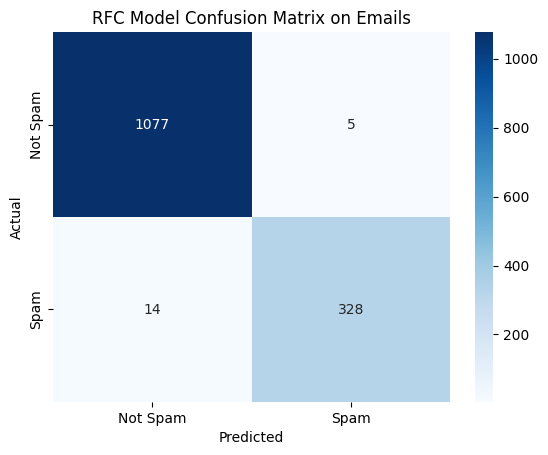


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1082
           1       0.98      0.96      0.97       342

    accuracy                           0.99      1424
   macro avg       0.99      0.98      0.98      1424
weighted avg       0.99      0.99      0.99      1424



In [ ]:
RFC_model_Emails = RandomForestClassifier(n_estimators=50, random_state=42)

print('RFC Model on Emails Dataset:')
RFC_model_Emails.fit(X_train_Emails_balanced, y_train_Emails_balanced)

print('\nTraining accuracy:')
y_train_pred = RFC_model_Emails.predict(X_train_Emails_balanced)
print(sklearn.metrics.accuracy_score(y_train_Emails_balanced, y_train_pred))

# testing the model

predictEmails = RFC_model_Emails.predict(X_test_Emails)

print('\nTesting accuracy:')
print(sklearn.metrics.accuracy_score(y_test_Emails, predictEmails))

print('\nConfusion matrix:')
print(confusion_matrix(y_test_Emails, predictEmails))

cm1 = confusion_matrix(y_test_Emails, predictEmails)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RFC Model Confusion Matrix on Emails')
plt.show()

print('\nClassification report:')
print(classification_report(y_test_Emails, predictEmails))